# Melanoma Detection Assignment 

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib
from pathlib import Path
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import sys


In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive/')  # mounting drive to notebook

root_path = 'gdrive/My Drive/Skin_Cancer_Dataset/'

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive/


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
from pathlib import Path # importing pathlib
data_dir_train = pathlib.Path('gdrive/My Drive/Skin_Cancer_Dataset/Train')
data_dir_test = pathlib.Path('gdrive/My Drive/Skin_Cancer_Dataset/Test')

In [6]:
# Counting the total number of images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32   # setting batch size variable
img_height = 180  # setting img heigh variable
img_width = 180   # setting img width variable

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(  # Train Drectory
  data_dir_train,
  validation_split=0.2,
  subset="training",     # assigning the subset as training
  seed=123,           # assigning seed as 123
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2249 files belonging to 9 classes.
Using 1800 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(  # Validation Directory
  data_dir_train,
  validation_split=0.2,
  subset="validation",      # assigning the subset as validation
  seed=123,              # assigning seed as 123
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory( # creating the test dataset
    directory= data_dir_test,
    labels= 'inferred',
    image_size= (img_height, img_width),
    seed= 123,
    batch_size= batch_size,
)

Found 118 files belonging to 9 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'output', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

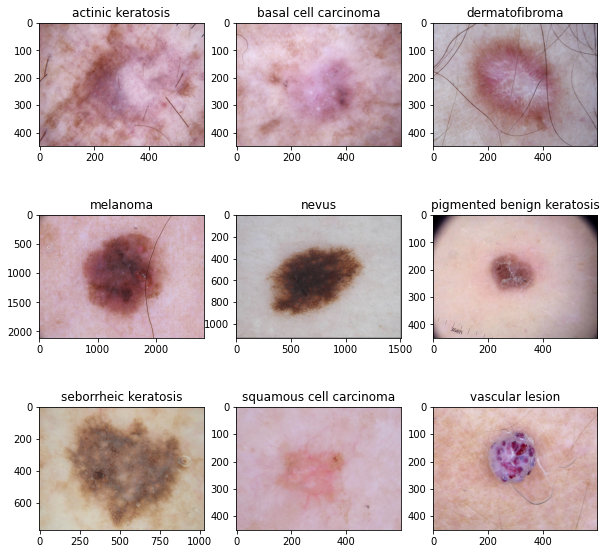

In [ ]:
import matplotlib.pyplot as plt


# plotting one  image from each of the nine classes

plt.figure(figsize=(10,10)) 
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

num_classes = len(class_names)

model = Sequential([   # creating a sequential model
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 5, padding='same', activation='relu'), 
  layers.MaxPooling2D(),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        2

### Train the model

In [ ]:
epochs = 20  # Training he model with 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 268s 4s/step - loss: 2.0670 - accuracy: 0.2044 - val_loss: 2.0341 - val_accuracy: 0.1960
Epoch 2/20
57/57 [==============================] - 19s 306ms/step - loss: 2.0037 - accuracy: 0.2456 - val_loss: 2.0821 - val_accuracy: 0.1960
Epoch 3/20
57/57 [==============================] - 19s 300ms/step - loss: 2.0333 - accuracy: 0.1994 - val_loss: 2.0308 - val_accuracy: 0.2249
Epoch 4/20
57/57 [==============================] - 19s 297ms/step - loss: 1.8455 - accuracy: 0.3267 - val_loss: 1.7776 - val_accuracy: 0.3630
Epoch 5/20
57/57 [==============================] - 19s 299ms/step - loss: 1.6509 - accuracy: 0.4028 - val_loss: 1.6449 - val_accuracy: 0.4388
Epoch 6/20
57/57 [==============================] - 19s 298ms/step - loss: 1.5684 - accuracy: 0.4389 - val_loss: 1.6681 - val_accuracy: 0.3987
Epoch 7/20
57/57 [==============================] - 19s 302ms/step - loss: 1.4867 - accuracy: 0.4733 - val_loss: 1.5055 - val_accuracy: 0.4499
E

### Visualizing training results

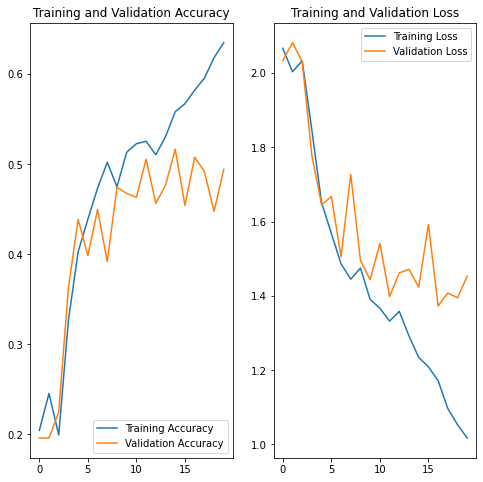

In [ ]:
# Visualising the accuracy and loss of the training and validation data

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

# Discussion 1
---
- This was the first run of the model 
- It was a simple model to see how the model performs without tuning
- after running for 20 epochs it can be seen that the model performs at 63% accuracy and 49% validation accuracy which is not very good
- this model is an underfitting model
- we will create a new model containg dropout layers
---

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = len(class_names)

model_2_drp = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Dropout(0.1),                                      #dropout layer 0.1
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Dropout(0.15),                                     #dropout layer 0.15
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Dropout(0.2),                                      #dropout layer 0.2
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dropout(0.5),                                      # dropout layer 0.5
  layers.Dense(num_classes)
])


### Compiling the model

In [ ]:
## Your code goes here

### Todo, choose an appropirate optimiser and loss function
model_2_drp.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model_2_drp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model_2_drp.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 25s 344ms/step - loss: 2.1714 - accuracy: 0.1989 - val_loss: 2.1410 - val_accuracy: 0.1915
Epoch 2/20
57/57 [==============================] - 19s 304ms/step - loss: 2.1367 - accuracy: 0.2044 - val_loss: 2.1133 - val_accuracy: 0.1915
Epoch 3/20
57/57 [==============================] - 20s 316ms/step - loss: 2.1103 - accuracy: 0.2033 - val_loss: 2.0926 - val_accuracy: 0.1915
Epoch 4/20
57/57 [==============================] - 19s 303ms/step - loss: 2.0864 - accuracy: 0.2028 - val_loss: 2.0772 - val_accuracy: 0.1915
Epoch 5/20
57/57 [==============================] - 20s 308ms/step - loss: 2.0796 - accuracy: 0.2072 - val_loss: 2.0654 - val_accuracy: 0.1915
Epoch 6/20
57/57 [==============================] - 19s 301ms/step - loss: 2.0705 - accuracy: 0.1994 - val_loss: 2.0575 - val_accuracy: 0.1915
Epoch 7/20
57/57 [==============================] - 20s 309ms/step - loss: 2.0634 - accuracy: 0.2078 - val_loss: 2.0517 - val_accuracy: 0.1960

### Visualizing the results

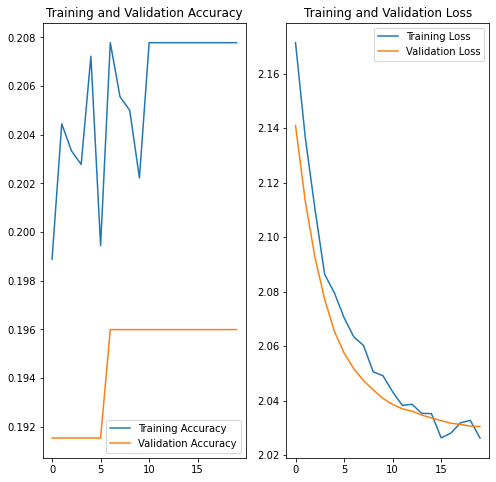

In [ ]:
# Visualising the accuracy and loss of the training and validation data


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

# Discussion 2
---
- It can clearly be seen that the model is dramatically underfitting
- The immediate reason looks like using dropout
- But this may have occored due to the uneven spread of the data in different classes or class imbalance
- First we need to check the class imbalance
---

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

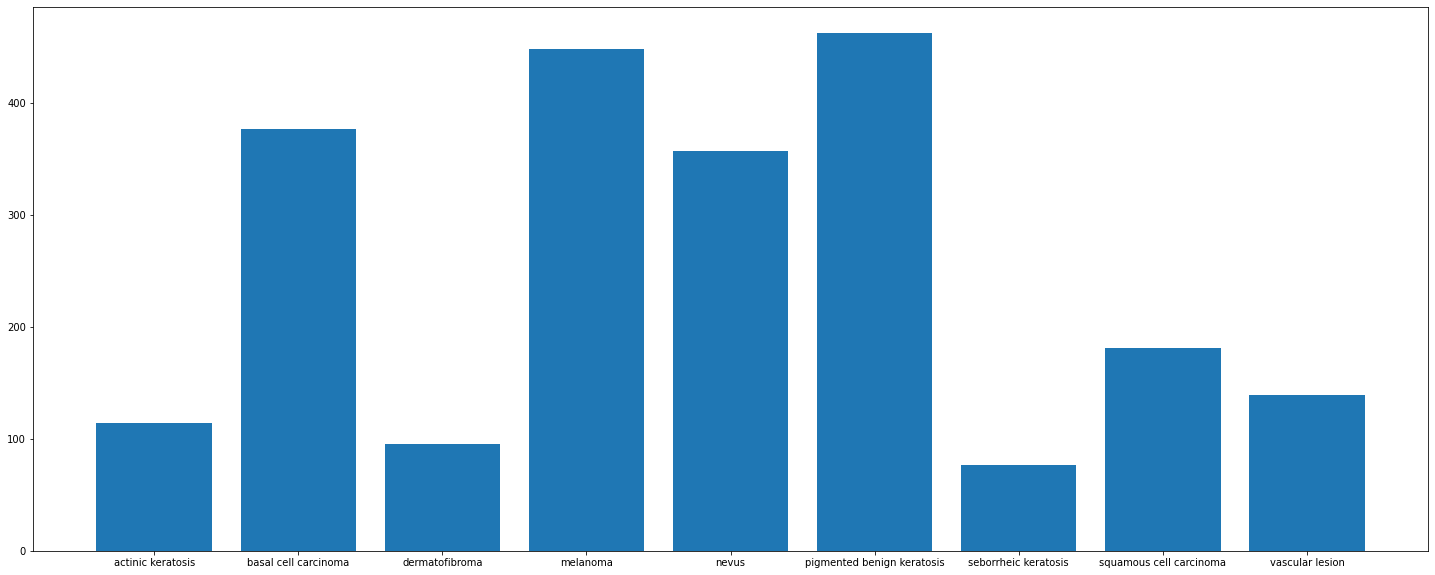

In [ ]:
## Your code goes here.

### Creating a bar graph to visualise the data distribution

count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


# Discussion 3 : 

## Answers
- Seborrheic Keratosis class has the least number of samples
- The class of 
1. Pigmented Benign Keraosis dominates the data in samples followed by 
2. Melanoma,
3. Basal Cell Carcinoma and 
4. Nevus

- from the above graph A Class Imbalance can be clearly observed
- This can be rectified using augmentation

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor #installing augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(data_dir_train)
    p.rotate(probability=0.9, max_left_rotation=10, max_right_rotation=10)
    p.sample(700) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer_Dataset/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F15000C5C10>: 100%|██████████| 700/700 [01:33<00:00,  7.46 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer_Dataset/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F150CF95750>: 100%|██████████| 700/700 [01:36<00:00,  7.23 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer_Dataset/Train/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F150B8B9490>: 100%|██████████| 700/700 [01:30<00:00,  7.73 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer_Dataset/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F150B8F3F90>: 100%|██████████| 700/700 [01:25<00:00,  8.17 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer_Dataset/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F150D025ED0>: 100%|██████████| 700/700 [01:26<00:00,  8.10 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer_Dataset/Train/output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7F15001BFA10>: 100%|██████████| 700/700 [01:18<00:00,  8.90 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer_Dataset/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F150007B950>: 100%|██████████| 700/700 [01:44<00:00,  6.71 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer_Dataset/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F15001A9F90>: 100%|██████████| 700/700 [01:41<00:00,  6.87 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer_Dataset/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1492311410>: 100%|██████████| 700/700 [01:43<00:00,  6.76 Samples/s]


Initialised with 2249 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer_Dataset/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F15001AAC90>: 100%|██████████| 700/700 [01:43<00:00,  6.78 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/output") # chaning the directry path to the new output folder

### Distribution of augmented data after adding new images to the original training data.

In [ ]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/output")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Total number of images after using Augmentor : ", image_count_train)

path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new


Total number of images after using Augmentor :  9086


[]

<BarContainer object of 10 artists>

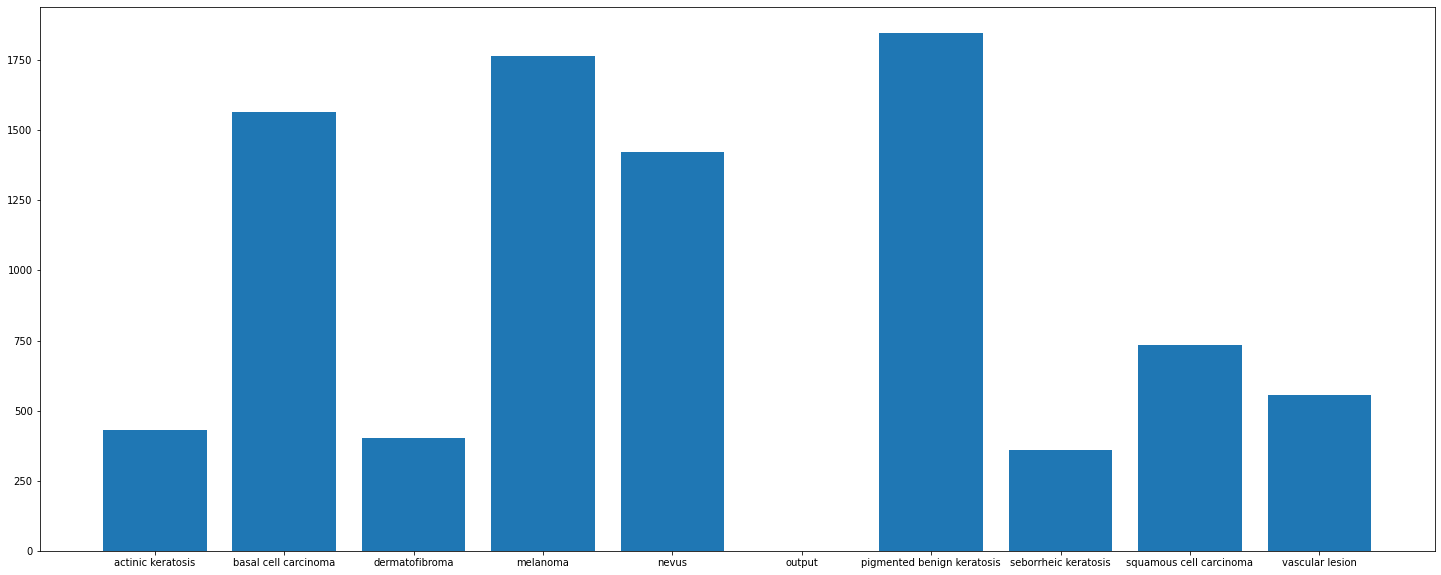

In [ ]:
## Your code goes here.

### Creating a bar graph to visualise the data distribution

count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32  # creating batch size varible
img_height = 180  # creating img height variable
img_width = 180   # creating img width variable

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train= pathlib.Path("/content/gdrive/MyDrive/Skin_Cancer_Dataset/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(  # Creating new training dataset made using Augmentor
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9086 files belonging to 9 classes.
Using 7269 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(   ## Creating new validaion dataset made using Augmentor
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9086 files belonging to 9 classes.
Using 1817 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

# The final Model

num_classes = len(class_names)

model_final = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 5, padding='same', activation='relu'),
  layers.BatchNormalization(),                                 # using batch normalisation
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.BatchNormalization(),                                 # using batch normalisation
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Dropout(0.1),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.BatchNormalization(),                                 # using batch normalisation
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Dropout(0.15),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.BatchNormalization(),                                 # using batch normalisation
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.BatchNormalization(),                                 # using batch normalisation
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),                                 # using batch normalisation
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
#Compiling the model
model_final.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model_final.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 16)      1216      
                                                                 
 batch_normalization_6 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 32)       

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model_final.fit(    # Training the final model for 30 epochs
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
228/228 [==============================] - 61s 236ms/step - loss: 1.9624 - accuracy: 0.4013 - val_loss: 2.4554 - val_accuracy: 0.2917
Epoch 2/30
228/228 [==============================] - 52s 222ms/step - loss: 1.5179 - accuracy: 0.4900 - val_loss: 1.9312 - val_accuracy: 0.3616
Epoch 3/30
228/228 [==============================] - 51s 218ms/step - loss: 1.3311 - accuracy: 0.5391 - val_loss: 1.8242 - val_accuracy: 0.4216
Epoch 4/30
228/228 [==============================] - 52s 221ms/step - loss: 1.1959 - accuracy: 0.5811 - val_loss: 1.3725 - val_accuracy: 0.5322
Epoch 5/30
228/228 [==============================] - 52s 223ms/step - loss: 1.1031 - accuracy: 0.6038 - val_loss: 1.1160 - val_accuracy: 0.5922
Epoch 6/30
228/228 [==============================] - 52s 225ms/step - loss: 1.0371 - accuracy: 0.6284 - val_loss: 0.9884 - val_accuracy: 0.6236
Epoch 7/30
228/228 [==============================] - 53s 228ms/step - loss: 0.9628 - accuracy: 0.6552 - val_loss: 1.2973 - val_ac

#### **Todo:**  Visualize the model results

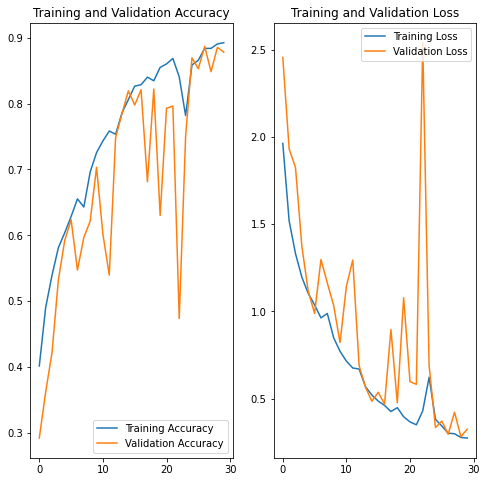

In [ ]:
# Visualising the accuracy and loss of the training and validation data


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



# Discussion 4
---
### The Final Layer
---
 **A total of 26 layers were used in the final model**
- 1 First a Rescaling Layer
- 5 convolutional layers (filters ranging 16, 32, 32, 64, 64)
- 5 Maxpooling layers - one after each convolution
- 1 Flatten layer
- 1 inner Dense layer with 128 filters, RelU activated
- 6 Dropouts were used after RelU activated layers with probablities of dropout ranging from 0.1 to 0.5
- 6 Batch normalization layers were used after each RelU activated layer
- 1 outer Dense layer to output 9 values
---
The final model had total 400970 paramerers
- The model was only trained for 30 epochs due to computational restraints
- the modle accuracy was 89.08% when compared to the validation accuracy of 88.55% 

---
- The under fitting of the first model was tackled by the final model
- The second model was grossly under fitting due to class imbalance which was rectified using Augmentor
- The number of training images increased due to the use of class rebalance techniques using Augmentor library
---
- The model seemed to perform well
- To be applicable on a deployable level the model needs more training data
and needs to be run for higher number of epochs 


In [ ]:
results = model_final.evaluate(test_ds)  #Checking the model on the train dataset

4/4 [==============================] - 22s 144ms/step - loss: 2.6047 - accuracy: 0.4915


---
- It looks like the model is not sufficiently trained enough to be deployed
- As commented earlier the model does need more training on higher number of images and higher number of epochs
